In [2]:
using LinearAlgebra
using Plots

In [3]:
# Definición de las matrices de Pauli
sigmax = [0 1.0; 1 0]
sigmay = [0 -1.0im; im 0]  # im representa la unidad imaginaria √(-1)
sigmaz = [1.0 0; 0 -1]

2×2 Matrix{Float64}:
 1.0   0.0
 0.0  -1.0

In [4]:
kron([sigmaz,sigmaz,I(2)]...)

8×8 Matrix{Float64}:
 1.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0
 0.0  1.0   0.0   0.0   0.0   0.0   0.0   0.0
 0.0  0.0  -1.0   0.0   0.0   0.0  -0.0   0.0
 0.0  0.0   0.0  -1.0   0.0   0.0   0.0  -0.0
 0.0  0.0   0.0   0.0  -1.0   0.0  -0.0   0.0
 0.0  0.0   0.0   0.0   0.0  -1.0   0.0  -0.0
 0.0  0.0  -0.0   0.0  -0.0   0.0   1.0   0.0
 0.0  0.0   0.0  -0.0   0.0  -0.0   0.0   1.0

In [5]:
sigmas = Dict(1=>sigmax, 2=>sigmay, 3=>sigmaz)
function Sigma(indice, pos, totalparticulas)
    id = I(2) #[1.0 0; 0 1.0]
    mat = sigmas[indice]
    list = []
    for i in 0:totalparticulas-1
        if i == pos 
            append!(list,[mat])
        else 
            append!(list,[id])
        end
        #println("$list")
    end
    return kron(list...)
end

Sigma (generic function with 1 method)

En un campo externo el modelo de Ising es 

$ H = - J \sum_{i=1}^{3}\sigma_i \sigma_{i+1} -h \sum_{i=1}^4 S_i  $ 

In [6]:
# Para la cadena abierta con n partículas tenemos usamos cerrada = false, para la cadena cerrada usamos cerrada = true
function Ising(N; cerrada = false) #Keyword Arguments
    H = 0
    totalparticulas = N
    if cerrada == false 
        M = (N - 1)
    elseif cerrada == true 
        M = N 
    end

    for i in 0:(M-1)
        H = H .+ J*(Sigma(3, mod(i,N),totalparticulas)*Sigma(3,mod((i+1),N),totalparticulas))
    end
    for j in 0:N-1
        H = H .+ h*Sigma(1,j,totalparticulas)
    end
    return H 
end

Ising (generic function with 1 method)

In [7]:
J = 1
h = 1
Ising(4,cerrada = false)

16×16 Matrix{Float64}:
 3.0  1.0   1.0  0.0   1.0   0.0   0.0  …   0.0   0.0  0.0   0.0  0.0  0.0
 1.0  1.0   0.0  1.0   0.0   1.0   0.0      0.0   0.0  0.0   0.0  0.0  0.0
 1.0  0.0  -1.0  1.0   0.0   0.0   1.0      1.0   0.0  0.0   0.0  0.0  0.0
 0.0  1.0   1.0  1.0   0.0   0.0   0.0      0.0   1.0  0.0   0.0  0.0  0.0
 1.0  0.0   0.0  0.0  -1.0   1.0   1.0      0.0   0.0  1.0   0.0  0.0  0.0
 0.0  1.0   0.0  0.0   1.0  -3.0   0.0  …   0.0   0.0  0.0   1.0  0.0  0.0
 0.0  0.0   1.0  0.0   1.0   0.0  -1.0      0.0   0.0  0.0   0.0  1.0  0.0
 0.0  0.0   0.0  1.0   0.0   1.0   1.0      0.0   0.0  0.0   0.0  0.0  1.0
 1.0  0.0   0.0  0.0   0.0   0.0   0.0      1.0   0.0  1.0   0.0  0.0  0.0
 0.0  1.0   0.0  0.0   0.0   0.0   0.0      0.0   1.0  0.0   1.0  0.0  0.0
 0.0  0.0   1.0  0.0   0.0   0.0   0.0  …  -3.0   1.0  0.0   0.0  1.0  0.0
 0.0  0.0   0.0  1.0   0.0   0.0   0.0      1.0  -1.0  0.0   0.0  0.0  1.0
 0.0  0.0   0.0  0.0   1.0   0.0   0.0      0.0   0.0  1.0   1.0  1.0  0.0
 0

In [8]:
ishermitian(Ising(4))

true

In [9]:
typeof(eigen(Ising(4)))
size(Ising(4))



(16, 16)

In [10]:
Al= eigen(Ising(4))
Al.vectors

16×16 Matrix{Float64}:
  0.108784  -2.03075e-16  -0.0744126    …  -0.616944     -0.479898
 -0.166667  -0.114007     -0.114007        -0.214263     -0.255348
 -0.255348   0.214263      0.328269        -0.114007     -0.166667
  0.146564  -0.0395941    -1.75861e-16     -6.35523e-16  -0.224549
 -0.255348  -0.214263      0.328269        -0.114007     -0.166667
  0.479898   0.616944      1.23967e-15  …  -6.65336e-17  -0.108784
  0.224549   1.88605e-16  -0.502938         0.0395941    -0.146564
 -0.166667  -0.114007      0.114007         0.214263     -0.255348
 -0.166667   0.114007     -0.114007        -0.214263     -0.255348
  0.224549  -2.41607e-16   0.502938        -0.0395941    -0.146564
  0.479898  -0.616944      1.1009e-15   …  -3.18391e-17  -0.108784
 -0.255348   0.214263     -0.328269         0.114007     -0.166667
  0.146564   0.0395941     1.57206e-16     -8.22873e-16  -0.224549
 -0.255348  -0.214263     -0.328269         0.114007     -0.166667
 -0.166667   0.114007      0.114007    

In [11]:
lambda, V = eigen(Ising(4,cerrada = true))

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
16-element Vector{Float64}:
 -5.226251859505498
 -4.828427124746188
 -2.164784400584785
 -1.9999999999999938
 -1.999999999999993
 -0.8284271247461872
 -3.479472467749812e-16
 -2.1960560291340604e-16
  8.881784197001252e-16
  1.3322676295501878e-15
  0.8284271247461905
  2.0000000000000004
  2.0000000000000004
  2.1647844005847916
  4.82842712474619
  5.226251859505506
vectors:
16×16 Matrix{Float64}:
  0.0766407  -1.11491e-16   0.114701  …  -0.385299  -0.653281     -0.576641
 -0.176777    0.135299     -0.176777      0.176777  -0.135299     -0.176777
 -0.176777   -0.135299     -0.176777      0.176777  -0.135299     -0.176777
  0.135299    7.59941e-17   0.326641      0.326641   1.9434e-16   -0.135299
 -0.176777    0.135299     -0.176777      0.176777  -0.135299     -0.176777
  0.576641   -0.653281     -0.385299  …   0.114701   2.15494e-16  -0.0766407
  0.135299   -1.87684e-16   0.326641      0.326641   2.13182e-16  -0.13529

In [12]:
lambda

16-element Vector{Float64}:
 -5.226251859505498
 -4.828427124746188
 -2.164784400584785
 -1.9999999999999938
 -1.999999999999993
 -0.8284271247461872
 -3.479472467749812e-16
 -2.1960560291340604e-16
  8.881784197001252e-16
  1.3322676295501878e-15
  0.8284271247461905
  2.0000000000000004
  2.0000000000000004
  2.1647844005847916
  4.82842712474619
  5.226251859505506

In [13]:
V

16×16 Matrix{Float64}:
  0.0766407  -1.11491e-16   0.114701  …  -0.385299  -0.653281     -0.576641
 -0.176777    0.135299     -0.176777      0.176777  -0.135299     -0.176777
 -0.176777   -0.135299     -0.176777      0.176777  -0.135299     -0.176777
  0.135299    7.59941e-17   0.326641      0.326641   1.9434e-16   -0.135299
 -0.176777    0.135299     -0.176777      0.176777  -0.135299     -0.176777
  0.576641   -0.653281     -0.385299  …   0.114701   2.15494e-16  -0.0766407
  0.135299   -1.87684e-16   0.326641      0.326641   2.13182e-16  -0.135299
 -0.176777    0.135299     -0.176777      0.176777   0.135299     -0.176777
 -0.176777   -0.135299     -0.176777      0.176777  -0.135299     -0.176777
  0.135299   -6.27838e-17   0.326641      0.326641   1.9434e-16   -0.135299
  0.576641    0.653281     -0.385299  …   0.114701   1.4413e-16   -0.0766407
 -0.176777   -0.135299     -0.176777      0.176777   0.135299     -0.176777
  0.135299   -1.73806e-16   0.326641      0.326641   1.70344e-1

In [14]:
example = Dict(:cerrada => true)  # Se utiliza el : para definir la llave (key) del diccionario
typeof(:a)

Symbol

In [15]:
Ising(6;example...)

64×64 Matrix{Float64}:
 6.0  1.0  1.0  0.0  1.0   0.0  0.0  …  0.0   0.0  0.0  0.0  0.0  0.0  0.0
 1.0  2.0  0.0  1.0  0.0   1.0  0.0     0.0   0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  2.0  1.0  0.0   0.0  1.0     0.0   0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  1.0  2.0  0.0   0.0  0.0     0.0   0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  2.0   1.0  1.0     0.0   0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  1.0  -2.0  0.0  …  0.0   0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  1.0   0.0  2.0     0.0   0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0   1.0  1.0     0.0   0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0   0.0  0.0     0.0   0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0   0.0  0.0     0.0   0.0  0.0  0.0  0.0  0.0  0.0
 ⋮                         ⋮         ⋱                  ⋮              
 0.0  0.0  0.0  0.0  0.0   0.0  0.0  …  0.0   0.0  0.0  0.0  0.0  0.0  1.0
 0.0  0.0  0.0  0.0  0.0   0.0  0.0     1.0   1.0  0.0  1.0  0.0  0.0  0.0
 0.0 

In [16]:
# En un campo externo h 
function Ising2(N,h; cerrada = false) #Keyword Arguments
    H = 0
    totalparticulas = N
    if cerrada == false 
        M = (N - 1)
    elseif cerrada == true 
        M = N 
    end

    for i in 0:(M-1)
        H = H .+ J*(Sigma(3, mod(i,N),totalparticulas)*Sigma(3,mod((i+1),N),totalparticulas))
    end
    for j in 0:N-1
        H = H .+ h*Sigma(1,j,totalparticulas)
    end
    return H 
end

Ising2 (generic function with 1 method)

In [52]:
N = 4 # Número de partículas 
list = []
for b in 0:0.001:1
     Ham = Ising2(N,b,cerrada = false)
     Vals = eigen(Ham).values
     append!(list,map(x->[b,x],Vals))
end

In [53]:
list
x_list = [l[1] for l in list]
y_list = [l[2] for l in list]

16016-element Vector{Float64}:
 -3.0
 -3.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
 -1.0
  1.0
  1.0
  ⋮
 -0.30540728933227523
  0.30540728933228145
  1.0000000000000004
  1.0000000000000049
  1.6945927106677239
  2.0641777724759147
  2.758770483143631
  4.064177772475913
  4.758770483143634

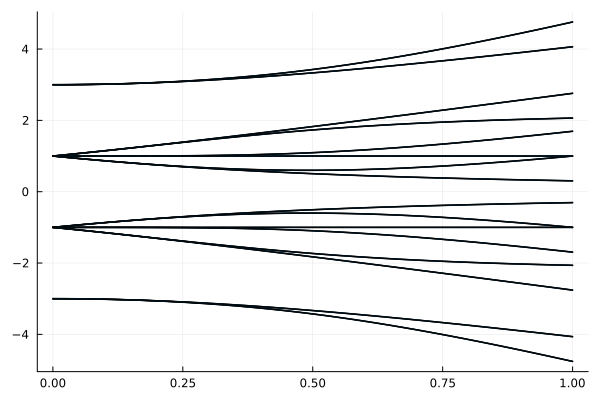

In [55]:
scatter(x_list,y_list, label = false, markersize = 0.5)
# Con el campo se rompe la simetría esférica (se rompe la degeneración)